# Introduction 

HCAHPS (Hospital Consumer Assessment of Healthcare Providers and Systems) survey is a national standardized survey used to capture patients' perspective of hospital care. HCAHPS were designed with three goals in mind: 1) create data of patients' perspective of care 2) allow results to be public reports to incentivize hospitals to improve care 3) create transparency and accountability in healthcare to collectively improve quality of care.$^{1}$

Every year Centers for Medicare & Medicaid Services (CMS) withholds 2% of a hospital's revenue that would need to be earned through the Hospital Value-Based Purchasing (VBP) Program that gives penalties or bonuses based on Total Performance Scores (TPS). For an average hospital that has a base operating revenue of \\$200 million, the total withheld is \\$4 million, so there is a large incentive to minimize losses!$^{2}$ HCAHPS are used to calculate the patient and community engagement domain, one of four domains, that each contribute 25% to the TPS. 

The following analysis investigates surveys between October 2013 to October 2021 with the annual reports (collective quarterly reports) referred to by its release period (10/2013 -- 10/2014 reports referred to as 2015). The 10 HCAHPS dimensions used were communication with nurses, communication with doctors, responsiveness of hospital staff, communication about medicines, cleanliness of hospital environment, quietness of hospital environment, discharge information, care transition, and overall rating of hospital. Dataset obtained from Maven Analytics.

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read In Data and Prepare for Analysis

In [2]:
# Merge tables for comprehensive national results df & optimizie memory

measures = pd.read_csv('data_tables/measures.csv')
national_results = pd.read_csv('data_tables/national_results.csv')

results_national = (national_results.merge(
    measures,
    how='inner',
    left_on='Measure ID',
    right_on='Measure ID'
).drop(
    ['Type', 'Measure ID'],
    axis=1
).astype({
    'Bottom-box Percentage': 'int8',
    'Middle-box Percentage': 'int8',
    'Top-box Percentage': 'int8'
}))

# Format release period column into datatime type

results_national['Release Period'] = results_national['Release Period'].str.replace('_', '-')

results_national['Release Period'] = pd.to_datetime(
    results_national['Release Period'],
    format='%m-%Y'
)

display(measures.head(2), national_results.head(2))

display(results_national.head(4), results_national.info())

,Measure ID,Measure,Type
0,H_COMP_1,Communication with Nurses,Composite Measure
1,H_COMP_2,Communication with Doctors,Composite Measure


,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
0,07_2015,H_CLEAN_HSP,8,18,74
1,07_2015,H_COMP_1,4,17,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Release Period         90 non-null     datetime64[ns]
 1   Bottom-box Percentage  90 non-null     int8          
 2   Middle-box Percentage  90 non-null     int8          
 3   Top-box Percentage     90 non-null     int8          
 4   Measure                90 non-null     object        
dtypes: datetime64[ns](1), int8(3), object(1)
memory usage: 1.8+ KB


,Release Period,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage,Measure
0,2015-07-01,8,18,74,Cleanliness of Hospital Environment
1,2015-07-01,4,17,79,Communication with Nurses
2,2015-07-01,4,14,82,Communication with Doctors
3,2015-07-01,9,23,68,Responsiveness of Hospital Staff


None

In [3]:
# Merge tables for comprehensive states results df & optimizie memory

state_results = pd.read_csv('data_tables/state_results.csv')
states = pd.read_csv('data_tables/states.csv')

results_states = state_results.merge(
    states,
    how='inner',
    left_on='State',
    right_on='State'
).astype({
    'Bottom-box Percentage': 'int8',
    'Middle-box Percentage': 'int8',
    'Top-box Percentage': 'int8',
}).merge(
    measures,
    how='inner',
    left_on='Measure ID',
    right_on='Measure ID',
).drop(
    ['State', 'Measure ID', 'Type'],
    axis=1
)

# Format release period column into datatime type

results_states['Release Period'] = results_states['Release Period'].str.replace('_', '-')

results_states['Release Period'] = pd.to_datetime(
    results_states['Release Period'],
    format='%m-%Y'
)

display(state_results.head(2), states.head(2))

display(results_states.head(4), results_states.info())

,Release Period,State,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
0,07_2015,AK,H_CLEAN_HSP,8,22,70
1,07_2015,AK,H_COMP_1,9,17,74


,State,State Name,Region
0,AK,Alaska,Pacific
1,AL,Alabama,East South Central


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4580 entries, 0 to 4579
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Release Period         4580 non-null   datetime64[ns]
 1   Bottom-box Percentage  4580 non-null   int8          
 2   Middle-box Percentage  4580 non-null   int8          
 3   Top-box Percentage     4580 non-null   int8          
 4   State Name             4580 non-null   object        
 5   Region                 4580 non-null   object        
 6   Measure                4580 non-null   object        
dtypes: datetime64[ns](1), int8(3), object(3)
memory usage: 156.7+ KB


,Release Period,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage,State Name,Region,Measure
0,2015-07-01,8,22,70,Alaska,Pacific,Cleanliness of Hospital Environment
1,2015-07-01,9,17,74,Alaska,Pacific,Communication with Nurses
2,2015-07-01,10,15,75,Alaska,Pacific,Communication with Doctors
3,2015-07-01,11,21,68,Alaska,Pacific,Responsiveness of Hospital Staff


None

In [4]:
# Merge region column into responses for comprehensive responses df & optimizie memory

responses = pd.read_csv('data_tables/responses.csv').merge(
    states,
    how='inner',
    left_on='State',
    right_on='State'
).drop(
    ['State', 'Completed Surveys'],
    axis=1
).astype({'Region': 'category'})

# Format release period column into datatime type

responses['Release Period'] = responses['Release Period'].str.replace('_', '-')

responses['Release Period'] = pd.to_datetime(
    responses['Release Period'],
    format='%m-%Y'
)

# Drop missing data

responses = responses.replace('Not Available', pd.NA).dropna()

# Change Response Rate column from object to numeric

responses['Response Rate (%)'] = pd.to_numeric(responses['Response Rate (%)']).astype('int8')

display(states.head(2))

display(responses.head(4), responses.info())

,State,State Name,Region
0,AK,Alaska,Pacific
1,AL,Alabama,East South Central


<class 'pandas.core.frame.DataFrame'>
Index: 37403 entries, 0 to 42695
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release Period     37403 non-null  datetime64[ns]
 1   Facility ID        37403 non-null  object        
 2   Response Rate (%)  37403 non-null  int8          
 3   State Name         37403 non-null  object        
 4   Region             37403 non-null  category      
dtypes: category(1), datetime64[ns](1), int8(1), object(2)
memory usage: 1.2+ MB


,Release Period,Facility ID,Response Rate (%),State Name,Region
0,2015-07-01,10001,27,Alabama,East South Central
1,2015-07-01,10005,37,Alabama,East South Central
2,2015-07-01,10006,25,Alabama,East South Central
3,2015-07-01,10007,30,Alabama,East South Central


None

# Data Exploration 

## Overview Analysis <a class='anchor' id='table1'></a>
* [How many hospitals have participated over the past 9 years?](#first)
* [How were response rates across national, regional, state level over past 9 years?](#second)
    * [Summary](#sum_one)
* [Have hospitals made improvements in their quality of care over the past 9 years?](#third)
    * [Summary](#sum_two)
* [Have top-box scores improved from 2015 to 2023?](#fourth)
    * [Summary](#sum_three)
* [Have middle-box scores improved from 2015 to 2023?](#fifth)
    * [Summary](#sum_four)
* [Have bottom-box scores improved from 2015 to 2023?](#sixth)
    * [Summary](#sum_five)<br></br>
* [Skip to granular analysis](#table2)<br></br>
* [Final Recommendations](#recs)

## How many hospitals have participated over the past 9 years? <a class='anchor' id='first'></a>

,Facility ID
Release Period,
2015-12-31,4158
2016-12-31,4187
2017-12-31,4101
2018-12-31,4124
2019-12-31,4220
2020-12-31,4214
2021-12-31,4165
2022-12-31,4124
2023-12-31,4110


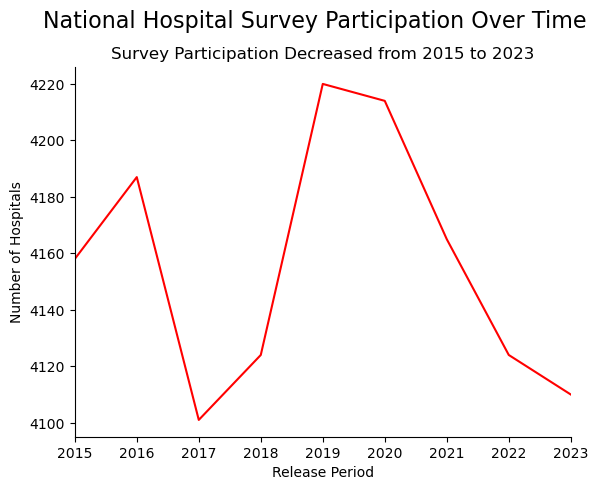

In [5]:
hospital_participation = responses.set_index('Release Period').resample('YE')[['Facility ID']].count()

display(hospital_participation)

hospital_participation.plot(
    ylabel='Number of Hospitals',
    title='Survey Participation Decreased from 2015 to 2023',
    legend=False,
    color='red'
)

plt.suptitle('National Hospital Survey Participation Over Time', y=1, fontsize=16)
sns.despine()

## How were response rates across national, regional, state level over past 9 years? <a class='anchor' id='second'></a>

,Response Rate (%)
Release Period,
2015-12-31,30.839346
2016-12-31,29.472892
2017-12-31,28.393075
2018-12-31,26.995393
2019-12-31,25.983175
2020-12-31,25.814903
2021-12-31,25.364466
2022-12-31,23.837536
2023-12-31,22.737226


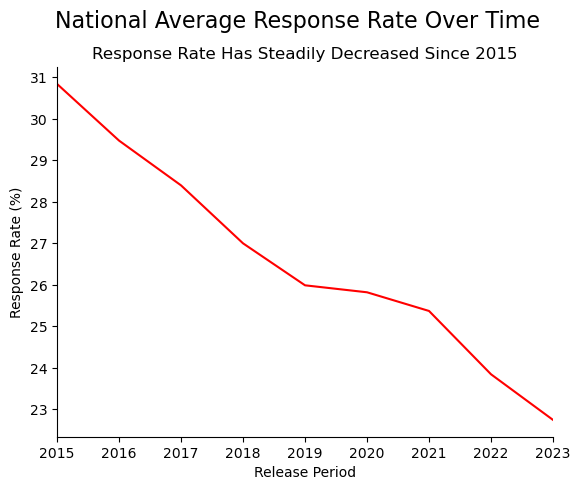

In [6]:
national_response_rate = responses.set_index('Release Period').resample('YE')[['Response Rate (%)']].mean()

display(national_response_rate)

national_response_rate.plot(
    ylabel='Response Rate (%)',
    title='Response Rate Has Steadily Decreased Since 2015',
    legend=False,
    color='red'
)

plt.suptitle('National Average Response Rate Over Time', y=1, fontsize=16)
sns.despine()

26.608400395690186

,Response Rate (%)
Region,
East North Central,29.476400
East South Central,24.789747
Mid-Atlantic,26.605448
Mountain,27.022476
New England,26.755277


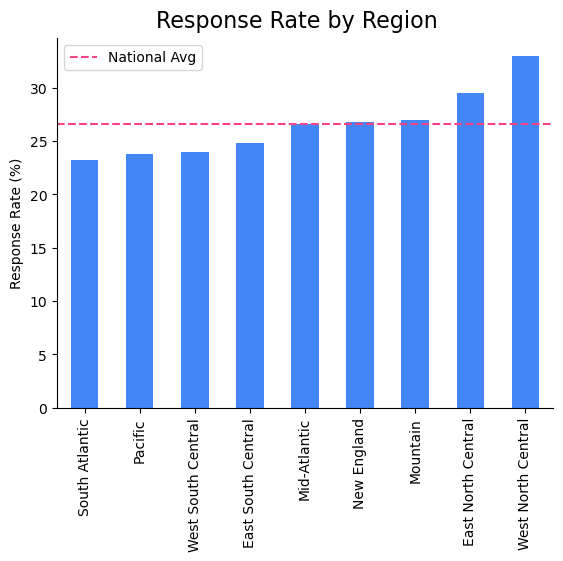

In [7]:
# Save national average as variable for data visualization 

national_mean = responses['Response Rate (%)'].mean()

display(national_mean)

region_responses = responses.groupby('Region', observed=True)[['Response Rate (%)']].mean()

display(region_responses.head())

ax3 = region_responses.sort_values('Response Rate (%)', ascending=True).plot.bar(
    xlabel='',
    ylabel='Response Rate (%)',
    legend=False,
    color='#4287f5'
)

ax3.axhline(national_mean, color='#F54287', linestyle='--', label='National Avg')
plt.suptitle('Response Rate by Region', y=.94, fontsize=16)

labels = ['National Avg']
handles, _ = ax3.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)

sns.despine()

,Response Rate (%)
State Name,
Alabama,25.729551
Alaska,21.760000
Arizona,27.603744
Arkansas,24.973554
California,22.843651


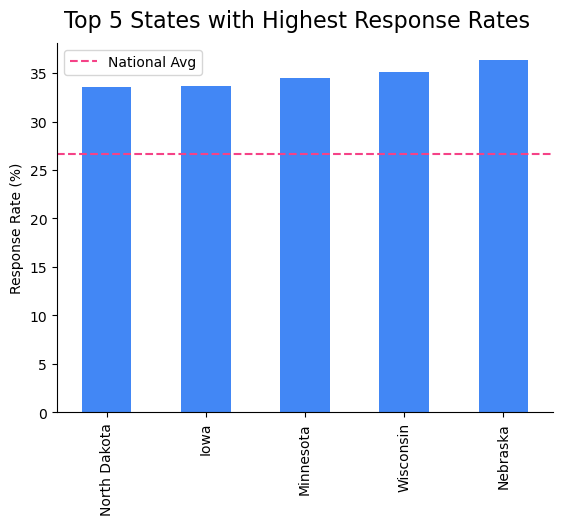

In [8]:
state_responses = responses.groupby('State Name')[['Response Rate (%)']].mean()

display(state_responses.head())

ax1 = state_responses.sort_values('Response Rate (%)', ascending=True).iloc[-5:].plot.bar(
    xlabel='',
    ylabel='Response Rate (%)',
    legend=False,
    color='#4287f5'
)

ax1.axhline(national_mean, color='#F54287', linestyle='--', label='National Avg')
plt.suptitle('Top 5 States with Highest Response Rates', y=.95, fontsize=16)

labels = ['National Avg']
handles, _ = ax1.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)

sns.despine()

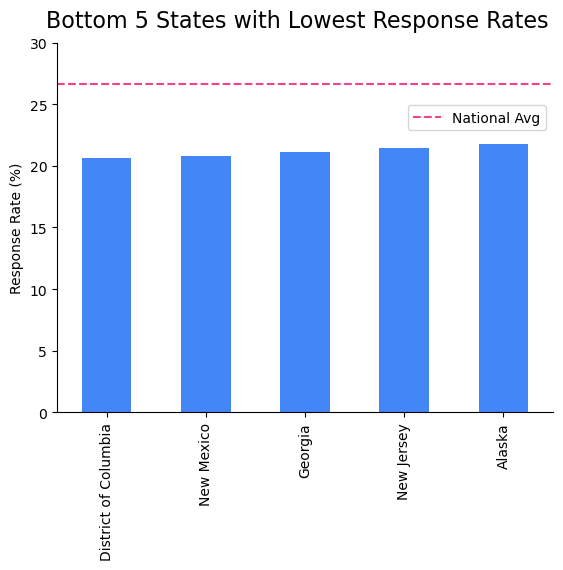

In [9]:
ax2 = state_responses.sort_values('Response Rate (%)', ascending=True).head(5).plot.bar(
    xlabel='',
    ylabel='Response Rate (%)',
    legend=False,
    color='#4287f5'
)

ax2.axhline(national_mean, color='#F54287', linestyle='--', label='National Avg')
plt.suptitle('Bottom 5 States with Lowest Response Rates', y=.95, fontsize=16)

labels = ['National Avg']
handles, _ = ax2.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels, bbox_to_anchor=(1, .85))
plt.ylim(0, 30)

sns.despine()

### Summary: <a class='anchor' id='sum_one'></a>

Since 2015, the national response rate and survey participation have steadily decreased, with a nearly 8% drop in the national response rate. 

The states with the lowest response rates include D.C., New Mexico, Georgia, New Jersey, and Alaska, all falling about 5% below the national average. In contrast, most northern regions were above the national average, while southern regions fell below.

## Have hospitals made improvements in their quality of care over the past 9 years? <a class='anchor' id='third'></a>

,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage,bottom,middle,top
Release Period,,,,,,
2015-12-31,8.4,20.6,71.0,NaN,NaN,NaN
2016-12-31,8.3,20.4,71.3,-0.011905,-0.009709,0.004225
2017-12-31,8.0,20.3,71.7,-0.036145,-0.004902,0.005610
2018-12-31,8.0,20.0,72.0,0.000000,-0.014778,0.004184
2019-12-31,8.2,19.8,72.0,0.025000,-0.010000,0.000000


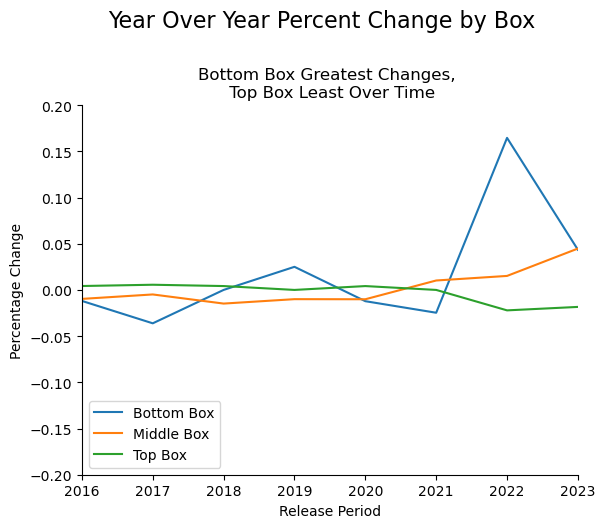

In [10]:
# Resample data to show box percentages per year and get percent changes per box 

yoy_box = (results_national.set_index('Release Period').resample('YE')
              ['Bottom-box Percentage', 'Middle-box Percentage', 'Top-box Percentage'].mean()
             .assign(
                 bottom= lambda x: x[['Bottom-box Percentage']].pct_change(),
                 middle= lambda x: x[['Middle-box Percentage']].pct_change(),
                 top= lambda x: x[['Top-box Percentage']].pct_change()
             ))

display(yoy_box.head())

# Visualize percent changes by box over time

yoy_box.iloc[1:, 3:].plot(
    ylabel=('Percentage Change'), 
    title='Bottom Box Greatest Changes, \n Top Box Least Over Time'
).legend(['Bottom Box', 'Middle Box', 'Top Box'], loc='lower left')

plt.suptitle('Year Over Year Percent Change by Box', y=1.08, fontsize=16)
plt.ylim(-.20, .20)
sns.despine()

,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
Release Period,,,
2015-12-31,8.4,20.6,71.0
2023-12-31,9.6,21.0,69.4


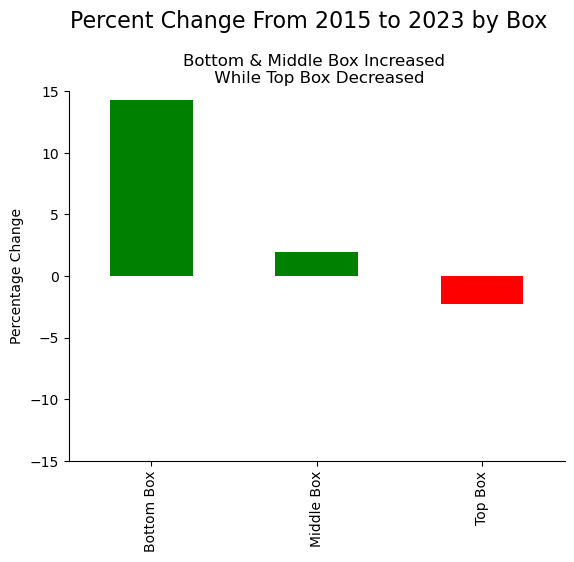

In [11]:
# Only use 2015 & 2023 from resampled data to obtain overall percent change

all_box_change = yoy_box.loc[['2015-12-31', '2023-12-31']].iloc[:, 0:3]

display(all_box_change)

# Use for loop to obtain percent change per box 

for column in all_box_change.columns:
    all_box_change[f"{column}"] = round(all_box_change[f"{column}"].pct_change() * 100, 2)

# Visualize over all percent changes by box  
    
all_box_change.loc['2023-12-31'].plot.bar(
    ylabel=('Percentage Change'),
    color=['green', 'green', 'red'],
    title='Bottom & Middle Box Increased \n While Top Box Decreased'
).set_xticklabels(['Bottom Box', 'Middle Box', 'Top Box'])

plt.suptitle('Percent Change From 2015 to 2023 by Box', y=1.05, fontsize=16)
plt.ylim(-15, 15)
sns.despine()

### Summary: <a class='anchor' id='sum_two'></a>

Over the past nine years, bottom box scores have shown significant improvements, with the highest percent change from 2015 to 2023, indicating a notable improvement among low patient satisfaction scores. Middle box scores have seen mild improvements. However, high patient satisfaction scores, represented as top box scores, have steadily declined over the same period.

## Have top-box scores improved from 2015 to 2023? <a class='anchor' id='fourth'></a>

Measure,Care Transition,Cleanliness of Hospital Environment,Communication about Medicines,Communication with Doctors,Communication with Nurses,Discharge Information,Overall Hospital Rating,Quietness of Hospital Environment,Responsiveness of Hospital Staff,Willingness to Recommend the Hospital
Release Period,,,,,,,,,,
2015,52.0,74.0,65.0,82.0,79.0,86.0,71.0,62.0,68.0,71.0
2023,51.0,72.0,61.0,79.0,79.0,86.0,70.0,62.0,65.0,69.0


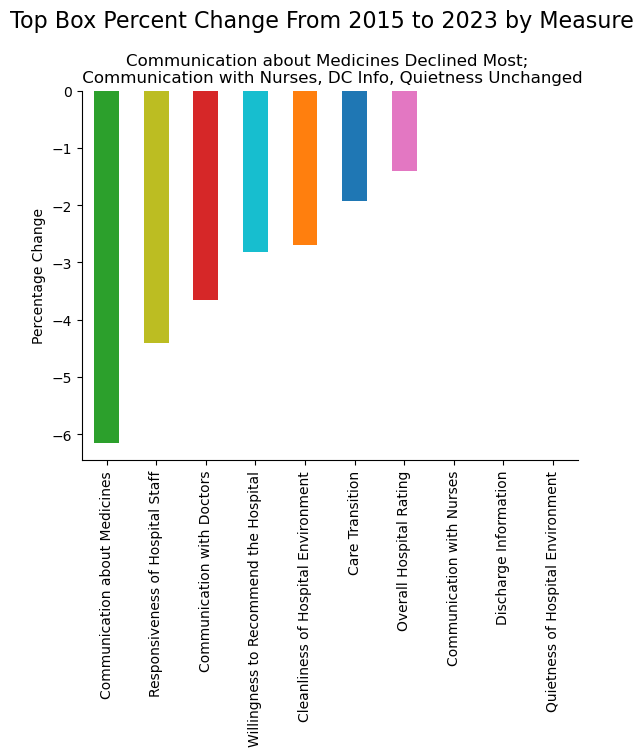

In [12]:
# Create pivot table and only access year 2015 & 2023 for overall percent change per measure

top_box_change = results_national.pivot_table(
    index=results_national['Release Period'].dt.year,
    columns='Measure',
    values='Top-box Percentage',
    aggfunc='mean'
).loc[[2015, 2023], :]

display(top_box_change)

# For loop to obtain percent change per measure 

for column in top_box_change.columns:
    top_box_change[f"{column}"] = round(top_box_change[f"{column}"].pct_change() * 100, 2)

#Visualize data 
(top_box_change.loc[2023].sort_values()
 .plot.bar(
     xlabel='', 
     ylabel='Percentage Change', 
     color=['#2ca02c', '#bcbd22', '#d62728', '#17becf', '#ff7f0e', '#1f77b4', '#e377c2'],
     title=("Communication about Medicines Declined Most; \n Communication with Nurses, DC Info, Quietness Unchanged")
 ))

plt.suptitle('Top Box Percent Change From 2015 to 2023 by Measure', y=1.05, fontsize=16)
sns.despine()

### Summary: <a class='anchor' id='sum_three'></a>

The percent changes in the top box from 2015 to 2023 indicate decreases across all measures, with no positive changes. This suggests there has been no improvement in patient satisfaction scores since 2015.

## Have middle-box scores improved from 2015 to 2023? <a class='anchor' id='fifth'></a>

Measure,Care Transition,Cleanliness of Hospital Environment,Communication about Medicines,Communication with Doctors,Communication with Nurses,Discharge Information,Overall Hospital Rating,Quietness of Hospital Environment,Responsiveness of Hospital Staff,Willingness to Recommend the Hospital
Release Period,,,,,,,,,,
2015,43.0,18.0,17.0,14.0,17.0,0.0,21.0,29.0,23.0,24.0
2023,43.0,18.0,19.0,16.0,16.0,0.0,21.0,28.0,24.0,25.0


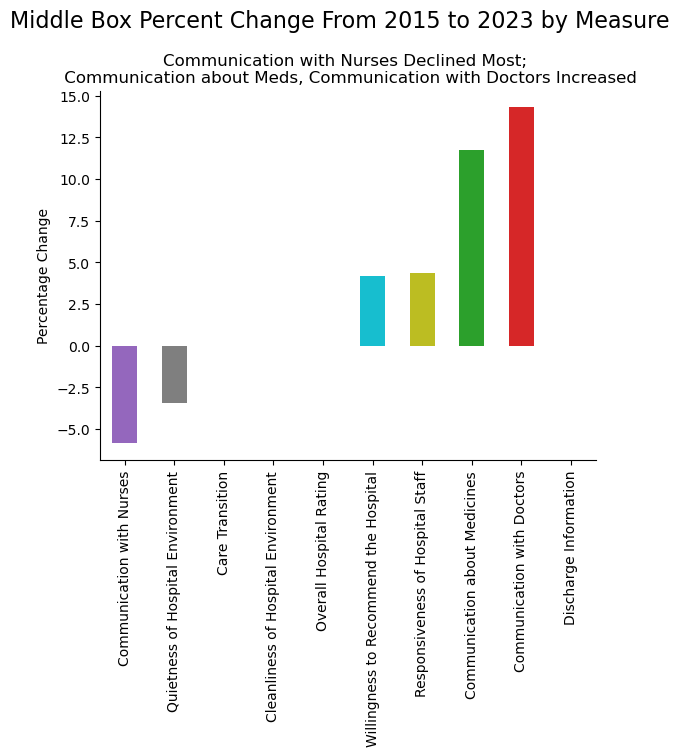

In [13]:
# Create pivot table and only access year 2015 & 2023 for overall percent change per measure

middle_box_change = results_national.pivot_table(
    index=results_national['Release Period'].dt.year,
    columns='Measure',
    values='Middle-box Percentage',
    aggfunc='mean'
).loc[[2015, 2023], :]

display(middle_box_change)

# For loop to obtain percent change per measure 

for column in middle_box_change.columns:
    middle_box_change[f"{column}"] = round(middle_box_change[f"{column}"].pct_change() * 100, 2)

#Visualize data 

(middle_box_change.loc[2023].sort_values()
 .plot.bar(
     xlabel='', 
     ylabel='Percentage Change', 
     color=['#9467bd', '#7f7f7f', 'white', 'white', 'white', '#17becf', '#bcbd22', '#2ca02c', '#d62728'],
     title=("Communication with Nurses Declined Most; \n Communication about Meds, Communication with Doctors Increased")
 ))

plt.suptitle('Middle Box Percent Change From 2015 to 2023 by Measure', y=1.05, fontsize=16)
sns.despine()

### Summary: <a class='anchor' id='sum_four'></a>

The percent changes in the middle box from 2015 to 2023 show overall positive improvements across all measures. However, communication with nurses remains the lowest performing patient satisfaction measure.

## Have bottom-box scores improved from 2015 to 2023? <a class='anchor' id='sixth'></a>

Measure,Care Transition,Cleanliness of Hospital Environment,Communication about Medicines,Communication with Doctors,Communication with Nurses,Discharge Information,Overall Hospital Rating,Quietness of Hospital Environment,Responsiveness of Hospital Staff,Willingness to Recommend the Hospital
Release Period,,,,,,,,,,
2015,5.0,8.0,18.0,4.0,4.0,14.0,8.0,9.0,9.0,5.0
2023,6.0,10.0,20.0,5.0,5.0,14.0,9.0,10.0,11.0,6.0


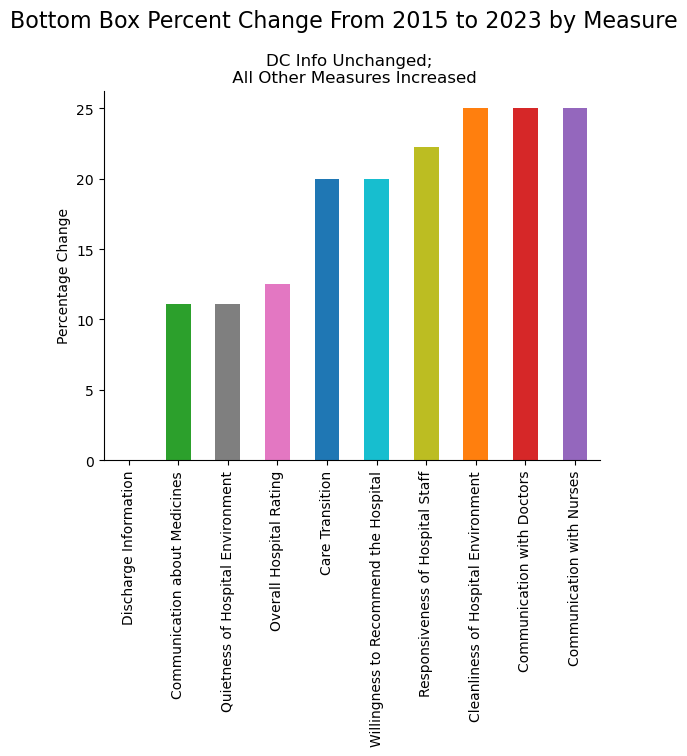

In [14]:
# Create pivot table and only access year 2015 & 2023 for overall percent change per measure

bottom_box_change = results_national.pivot_table(
    index=results_national['Release Period'].dt.year,
    columns='Measure',
    values='Bottom-box Percentage',
    aggfunc='mean'
).loc[[2015, 2023], :]

display(bottom_box_change)

# For loop to obtain percent change per measure 

for column in bottom_box_change.columns:
    bottom_box_change[f"{column}"] = round(bottom_box_change[f"{column}"].pct_change() * 100, 2)

# Visualize data 

(bottom_box_change.loc[2023].sort_values()
 .plot.bar(
     xlabel='', 
     ylabel='Percentage Change', 
     color=['white', '#2ca02c', '#7f7f7f', '#e377c2', '#1f77b4', 
            '#17becf', '#bcbd22', '#ff7f0e', '#d62728', '#9467bd'],
     title=('DC Info Unchanged; \n All Other Measures Increased')
 ))

plt.suptitle('Bottom Box Percent Change From 2015 to 2023 by Measure', y=1.05, fontsize=16)
sns.despine()

### Summary: <a class='anchor' id='sum_five'></a>

The percent changes in the bottom box from 2015 to 2023 have improved across all measures, except for discharge information, which showed no change.

## Granular Analysis <a class='anchor' id='table2'></a>

* [Return to overview analysis](#table1) <br></br>
* [What top-box measures have performed the best over past 9 years? ](#seven)
* [How did each top-box measure change over the past 9 years?](#eight)
* [What middle-box measures performed the best over past 9 years?](#nine)
* [How did each middle-box measure change over the past 9 years?](#ten)
* [What bottom-box measures performed the best over past 9 years?](#eleven)
* [How did each bottom-box measure change over the past 9 years?](#twelve)
    * [Summary](#sum_six) <br></br>
* [What states performed highest among top-box percentages?](#13)
* [What states performed lowest among bottom-box percentages?](#14)
    * [Summary](#sum_seven)
* [What regions performed highest among top-box percentages?](#15) 
* [What regions performed lowest among bottom-box percentages?](#16) 
    * [Summary](#sum_eight)<br></br>
* [Final Recommendations](#recs)

## What top-box measures have performed the best over past 9 years? <a class='anchor' id='seven'></a>

Measure,Care Transition,Cleanliness of Hospital Environment,Communication about Medicines,Communication with Doctors,Communication with Nurses,Discharge Information,Overall Hospital Rating,Quietness of Hospital Environment,Responsiveness of Hospital Staff,Willingness to Recommend the Hospital
Release Period,,,,,,,,,,
2015,52.0,74.0,65.0,82.0,79.0,86.0,71.0,62.0,68.0,71.0
2016,52.0,74.0,65.0,82.0,80.0,87.0,72.0,62.0,68.0,71.0
2017,52.0,74.0,65.0,82.0,80.0,87.0,73.0,63.0,69.0,72.0
2018,53.0,75.0,66.0,82.0,80.0,87.0,73.0,62.0,70.0,72.0
2019,53.0,75.0,66.0,81.0,81.0,87.0,73.0,62.0,70.0,72.0


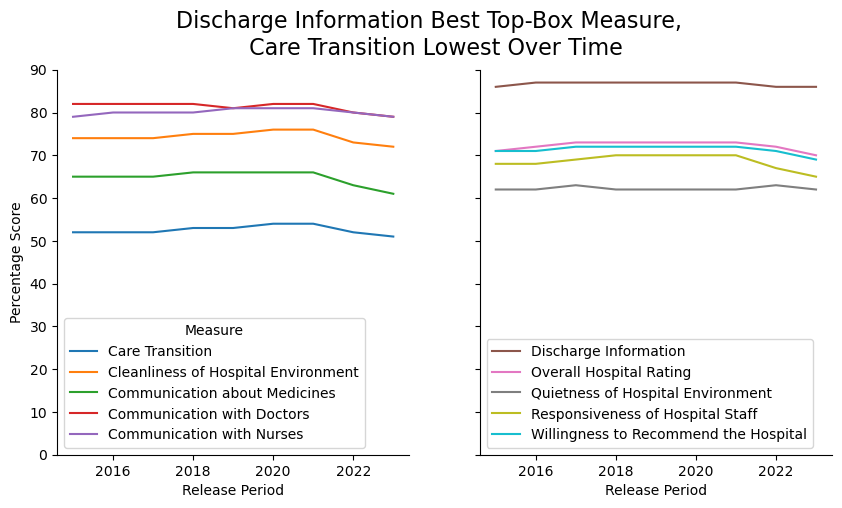

In [15]:
# Create pivot table for top-box measures over time

top_box = results_national.pivot_table(
    index=results_national['Release Period'].dt.year,
    columns='Measure',
    values='Top-box Percentage',
    aggfunc='mean'
)

display(top_box.head())

# Create subplots for easy visualization of measures over time

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey='all')

top_box1 = top_box.iloc[:, 0:5]
top_box2 = top_box.iloc[:, 5:]

top_box1.plot(ax=ax[0], ylabel='Percentage Score')

top_box2.plot(ax=ax[1], color=['C5', 'C6', 'C7', 'C8', 'C9']).legend(loc='lower left')


plt.suptitle(
    'Discharge Information Best Top-Box Measure, \n Care Transition Lowest Over Time', 
    y=1, 
    fontsize=16
)
plt.ylim(0, 90)

sns.despine()

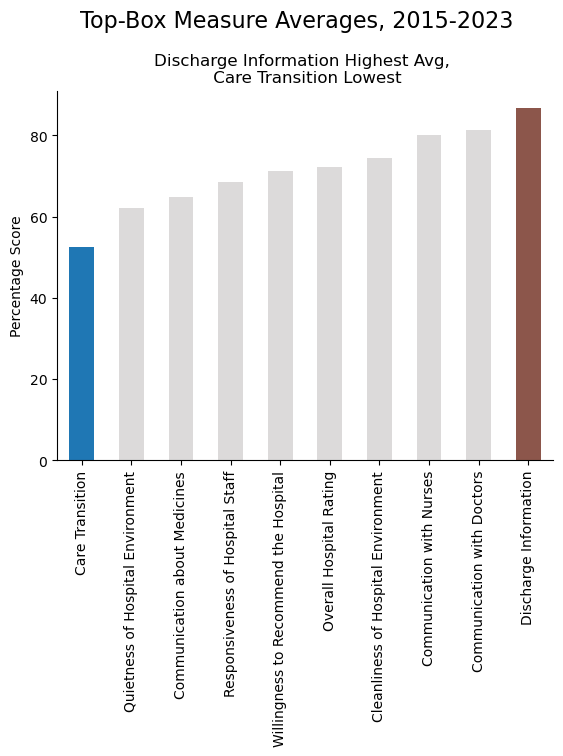

In [16]:
# Create bar chart of avg top-box measures across the years

top_box.mean(axis=0).sort_values().plot.bar(
    color=['#1f77b4', '#DCDADA', '#DCDADA', '#DCDADA',
           '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA',
           '#DCDADA', '#8c564b'],
    ylabel='Percentage Score',
    xlabel='',
    title='Discharge Information Highest Avg, \n Care Transition Lowest'
)

plt.suptitle('Top-Box Measure Averages, 2015-2023', fontsize=16, y=1.05)
sns.despine()

## How did each top-box measure change over the past 9 years? <a class='anchor' id='eight'></a>

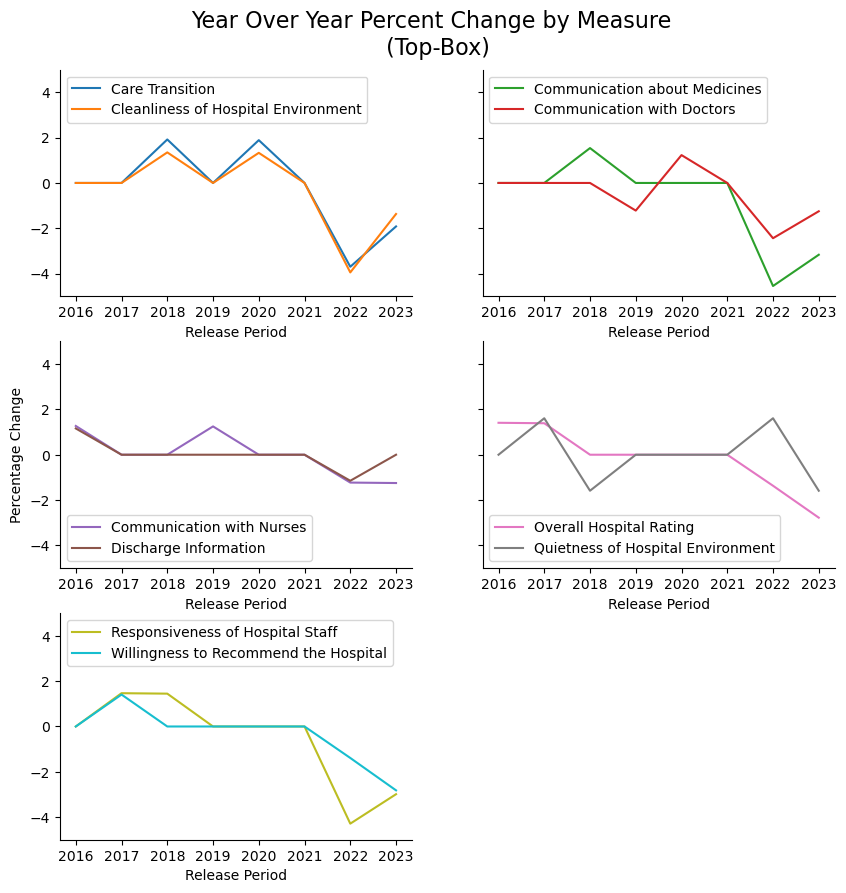

In [17]:
# Create for loop to find percent change per measure

for column in top_box.columns:
    top_box[f"{column}"] = round(top_box[f"{column}"].pct_change() * 100, 2)

percent_top_box = top_box

# Create subplot for optimal visualization

fig, ax = plt.subplots(3, 2, figsize=(10, 10), sharey='all')

percent_top_box.iloc[:, :2].plot(
    ax=ax[0][0]
).legend(loc='upper left')

percent_top_box.iloc[:, 2:4].plot(
    ax=ax[0][1],
    color=['C2', 'C3']
).legend(loc='upper left')

percent_top_box.iloc[:, 4:6].plot(
    ax=ax[1][0],
    color=['C4', 'C5'],
    ylabel='Percentage Change'
).legend(loc='lower left')

percent_top_box.iloc[:, 6:8].plot(
    ax=ax[1][1],
    color=['C6', 'C7']
).legend(loc='lower left')

percent_top_box.iloc[:, 8:10].plot(
    ax=ax[2][0],
    color=['C8', 'C9']
).legend(loc='upper left')

ax[2][1].set_axis_off()

plt.suptitle('Year Over Year Percent Change by Measure \n (Top-Box)', y=.94, fontsize=16)
plt.ylim(-5, 5)
sns.despine()

## What middle-box measures performed the best over past 9 years? <a class='anchor' id='nine'></a>

Measure,Care Transition,Cleanliness of Hospital Environment,Communication about Medicines,Communication with Doctors,Communication with Nurses,Overall Hospital Rating,Quietness of Hospital Environment,Responsiveness of Hospital Staff,Willingness to Recommend the Hospital
Release Period,,,,,,,,,
2015,43.0,18.0,17.0,14.0,17.0,21.0,29.0,23.0,24.0
2016,43.0,18.0,17.0,14.0,16.0,20.0,29.0,23.0,24.0
2017,43.0,18.0,18.0,14.0,16.0,20.0,28.0,23.0,23.0
2018,42.0,17.0,17.0,14.0,16.0,20.0,29.0,22.0,23.0
2019,42.0,18.0,17.0,14.0,15.0,19.0,28.0,22.0,23.0


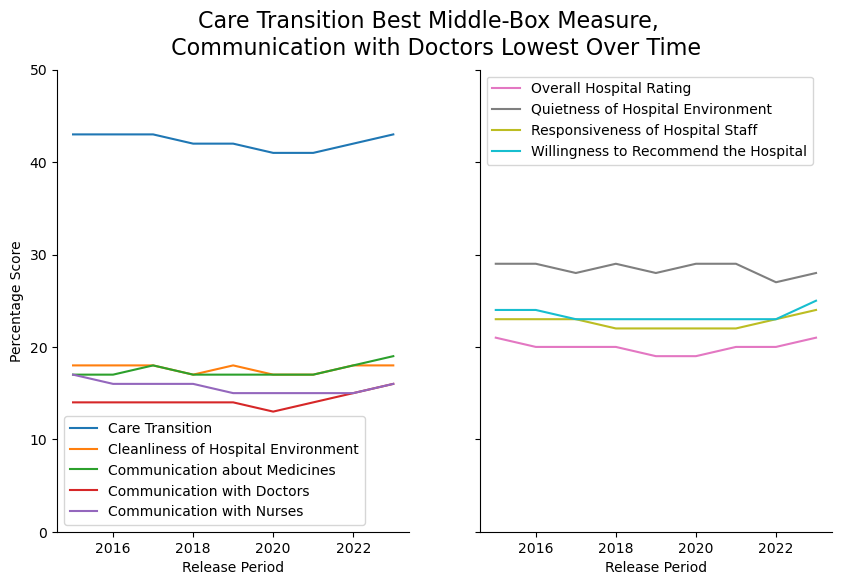

In [18]:
# Create pivot table for middle-box measures over time (DC info excluded, only has top & bottom box scores)

middle_box = results_national.query("Measure != 'Discharge Information'").pivot_table(
    index=results_national['Release Period'].dt.year,
    columns='Measure',
    values='Middle-box Percentage',
    aggfunc='mean'
)

display(middle_box.head())

# Create subplots for easy visualization of measures over time

fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey='all')

middle_box1 = middle_box.iloc[:, 0:5]
middle_box2 = middle_box.iloc[:, 5:]

middle_box1.plot(
    ax=ax[0], 
    ylabel='Percentage Score'
).legend(loc='lower left')

middle_box2.plot(
    ax=ax[1], 
    color=['C6', 'C7', 'C8', 'C9']
).legend(loc='upper left')

plt.suptitle(
    'Care Transition Best Middle-Box Measure, \n Communication with Doctors Lowest Over Time',
    y=.98, 
    fontsize=16
)
plt.ylim(0, 50)
sns.despine()

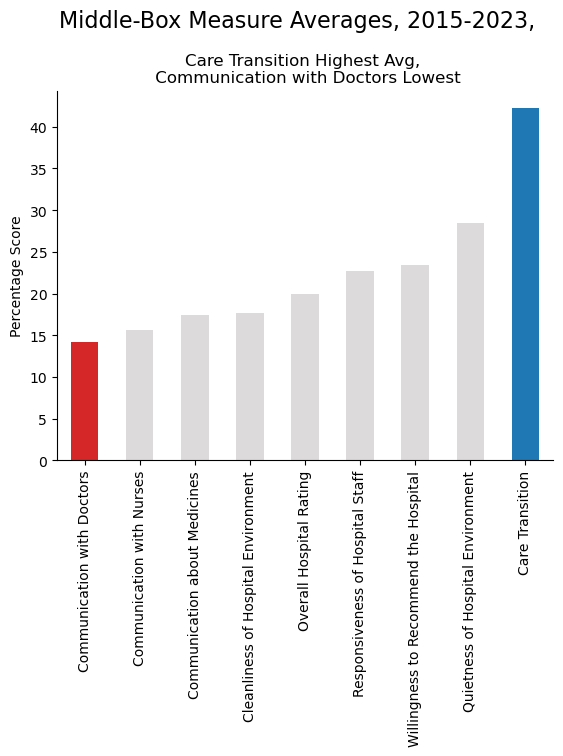

In [19]:
# Create bar chart of avg middle-box measures across the years

middle_box.mean(axis=0).sort_values().plot.bar(
    color=['#d62728', '#DCDADA', '#DCDADA', '#DCDADA',
           '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA',
           '#1f77b4'],
    ylabel='Percentage Score',
    xlabel='',
    title='Care Transition Highest Avg, \n Communication with Doctors Lowest'
)

plt.suptitle('Middle-Box Measure Averages, 2015-2023,', fontsize=16, y=1.05)
sns.despine()

## How did each middle-box measure change over the past 9 years? <a class='anchor' id='ten'></a>

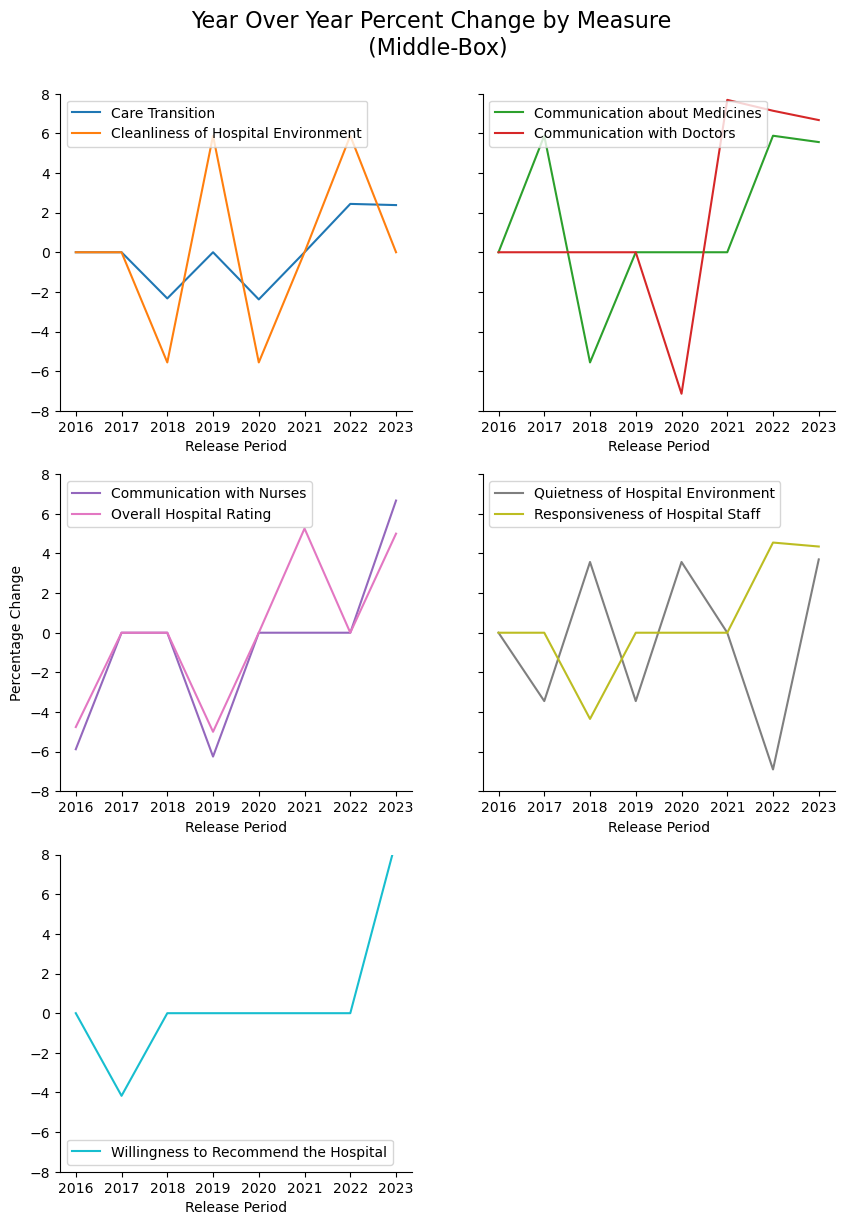

In [20]:
# Create for loop to find percent change per measure

for column in middle_box.columns:
    middle_box[f"{column}"] = round(middle_box[f"{column}"].pct_change() * 100, 2)

percent_middle_box = middle_box

# Create subplot for optimal visualization

fig, ax = plt.subplots(3, 2, figsize=(10, 14), sharey='all')

percent_middle_box.iloc[:, :2].plot(ax=ax[0][0]).legend(loc='upper left')

percent_middle_box.iloc[:, 2:4].plot(
    ax=ax[0][1], 
    color=['C2', 'C3']
).legend(loc='upper left')

percent_middle_box.iloc[:, 4:6].plot(
    ax=ax[1][0], 
    color=['C4', 'C6'],
    ylabel='Percentage Change'
).legend(loc='upper left')

percent_middle_box.iloc[:, 6:8].plot(
    ax=ax[1][1], 
    color=['C7', 'C8']
).legend(loc='upper left')

percent_middle_box.iloc[:, 8:].plot(
    ax=ax[2][0], 
    color='C9'
).legend(loc='lower left')

ax[2][1].set_axis_off()


plt.suptitle('Year Over Year Percent Change by Measure \n (Middle-Box)', y=.94, fontsize=16)
plt.ylim(-8, 8)
sns.despine()

## What bottom-box measures performed the best over past 9 years? <a class='anchor' id='eleven'></a>

Measure,Care Transition,Cleanliness of Hospital Environment,Communication about Medicines,Communication with Doctors,Communication with Nurses,Discharge Information,Overall Hospital Rating,Quietness of Hospital Environment,Responsiveness of Hospital Staff,Willingness to Recommend the Hospital
Release Period,,,,,,,,,,
2015,5.0,8.0,18.0,4.0,4.0,14.0,8.0,9.0,9.0,5.0
2016,5.0,8.0,18.0,4.0,4.0,13.0,8.0,9.0,9.0,5.0
2017,5.0,8.0,17.0,4.0,4.0,13.0,7.0,9.0,8.0,5.0
2018,5.0,8.0,17.0,4.0,4.0,13.0,7.0,9.0,8.0,5.0
2019,5.0,7.0,17.0,5.0,4.0,13.0,8.0,10.0,8.0,5.0


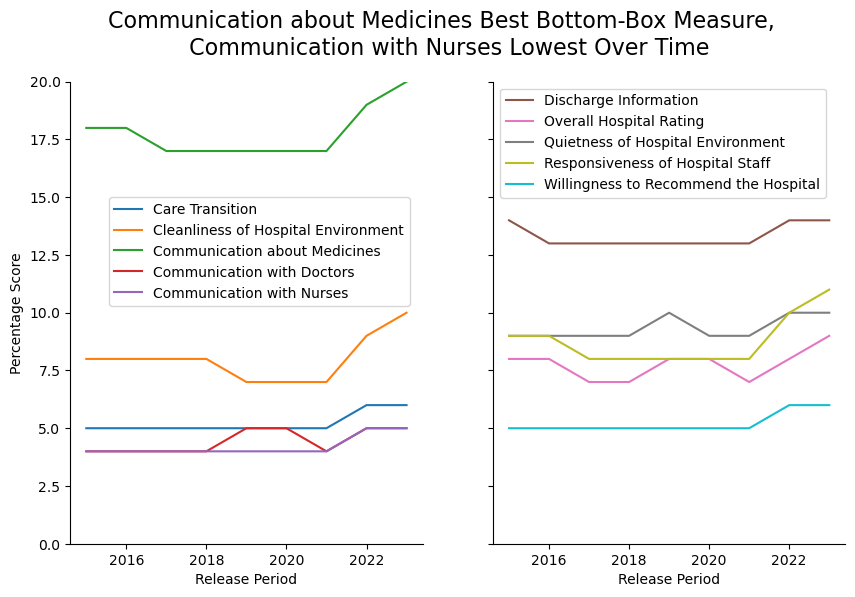

In [21]:
# Create pivot table for middle-box measures over time

bottom_box = results_national.pivot_table(
    index=results_national['Release Period'].dt.year,
    columns='Measure',
    values='Bottom-box Percentage',
    aggfunc='mean'
)

display(bottom_box.head())

# Create subplots for easy visualization of measures over time

fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey='all')

bottom_box1 = bottom_box.iloc[:, 0:5]
bottom_box2 = bottom_box.iloc[:, 5:]

bottom_box1.plot(ax=ax[0], ylabel='Percentage Score').legend(bbox_to_anchor=(.09, .5))

bottom_box2.plot(ax=ax[1], color=['C5', 'C6', 'C7', 'C8', 'C9']).legend(loc='upper left')

plt.suptitle(
    'Communication about Medicines Best Bottom-Box Measure, \n Communication with Nurses Lowest Over Time',
    y=1,
    fontsize=16
)
plt.ylim(0, 20)

sns.despine()

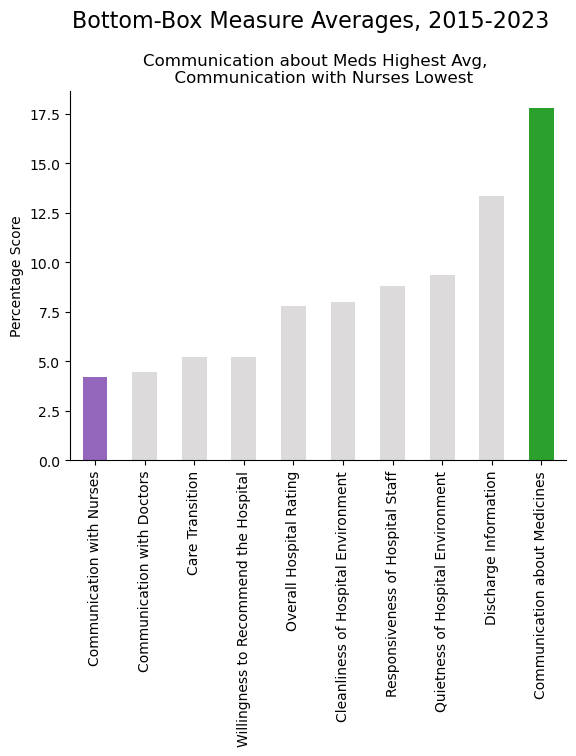

In [22]:
# Create bar chart of avg top-box measures across the years

bottom_box.mean(axis=0).sort_values().plot.bar(
    color=['#9467bd', '#DCDADA', '#DCDADA', '#DCDADA',
           '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA',
           '#DCDADA', '#2ca02c'],
    ylabel='Percentage Score',
    xlabel='',
    title='Communication about Meds Highest Avg, \n  Communication with Nurses Lowest'
)

plt.suptitle('Bottom-Box Measure Averages, 2015-2023', fontsize=16, y=1.05)
sns.despine()

## How did each bottom-box measure change over the past 9 years? <a class='anchor' id='twelve'></a>

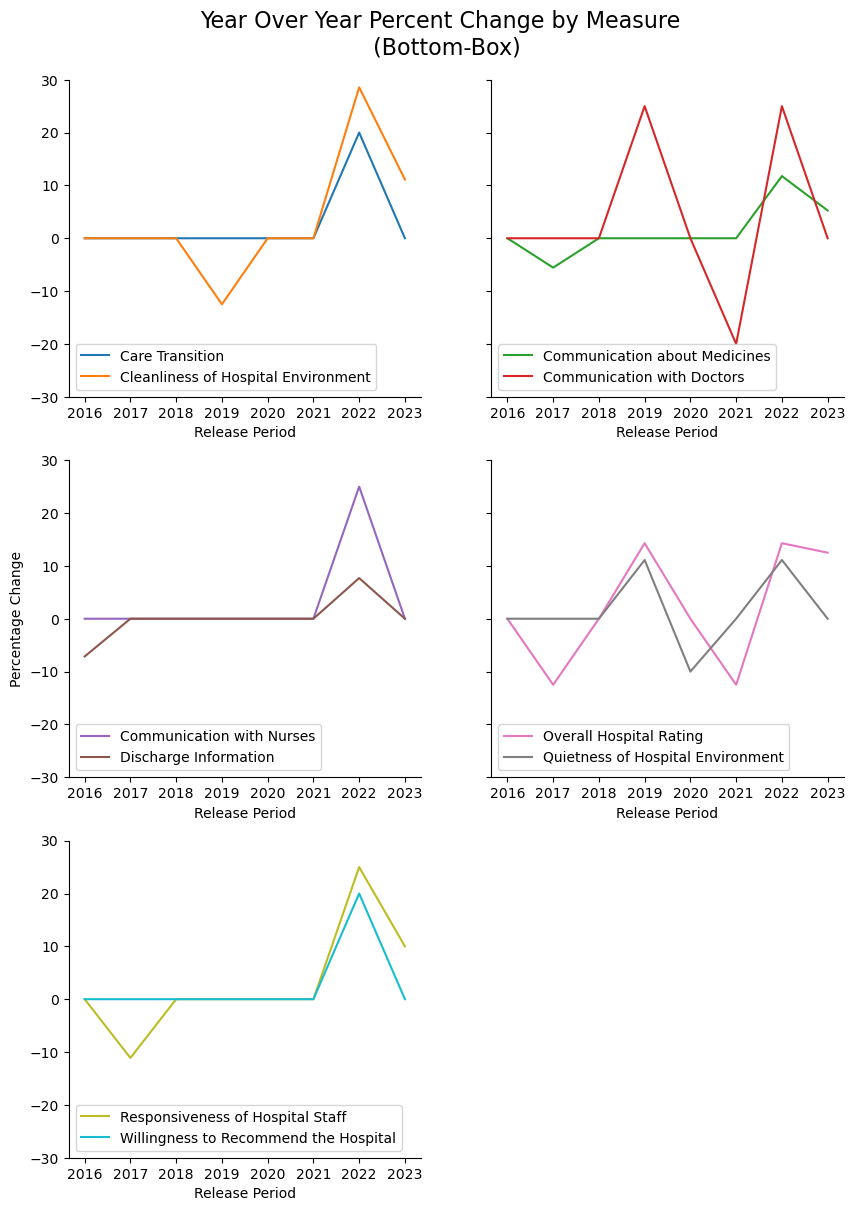

In [23]:
# Create for loop to find percent change per measure

for column in bottom_box.columns:
    bottom_box[f"{column}"] = round(bottom_box[f"{column}"].pct_change() * 100, 2)

percent_bottom_box = bottom_box

# Create subplot for optimal visualization

fig, ax = plt.subplots(3, 2, figsize=(10, 14), sharey='all')

percent_bottom_box.iloc[:, :2].plot(ax=ax[0][0]).legend(loc='lower left')

percent_bottom_box.iloc[:, 2:4].plot(
    ax=ax[0][1], 
    color=['C2', 'C3']
).legend(loc='lower left')

percent_bottom_box.iloc[:, 4:6].plot(
    ax=ax[1][0], 
    color=['C4', 'C5'],
    ylabel='Percentage Change'
).legend(loc='lower left')

percent_bottom_box.iloc[:, 6:8].plot(
    ax=ax[1][1], 
    color=['C6', 'C7']
).legend(loc='lower left')

percent_bottom_box.iloc[:, 8:10].plot(
    ax=ax[2][0], 
    color=['C8', 'C9']
).legend(loc='lower left')

ax[2][1].set_axis_off()

plt.suptitle('Year Over Year Percent Change by Measure \n (Bottom-Box)', y=.93, fontsize=16)
plt.ylim(-30, 30)
sns.despine()

### Summary: <a class='anchor' id='sum_six'></a>

Communication with nurses showed the lowest average score across the 9-year period, and notably, it exhibited the largest negative percentage change in middle box scores from 2015 to 2023. These findings suggest that communication with nurses is the measure with the lowest patient satisfaction based on national survey results.

## What states performed highest among top-box percentages? <a class='anchor' id='13'></a>

,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
State Name,,,
Alabama,8.688889,18.644444,72.666667
Alaska,8.144444,21.811111,70.044444
Arizona,10.011111,21.744444,68.244444
Arkansas,8.455556,19.488889,72.055556
California,10.877778,22.000000,67.122222


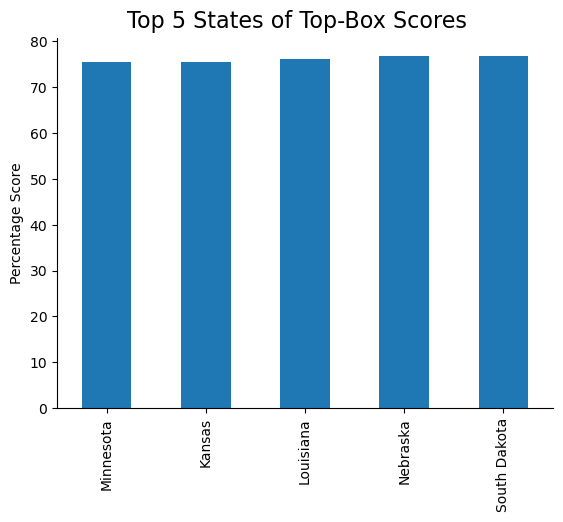

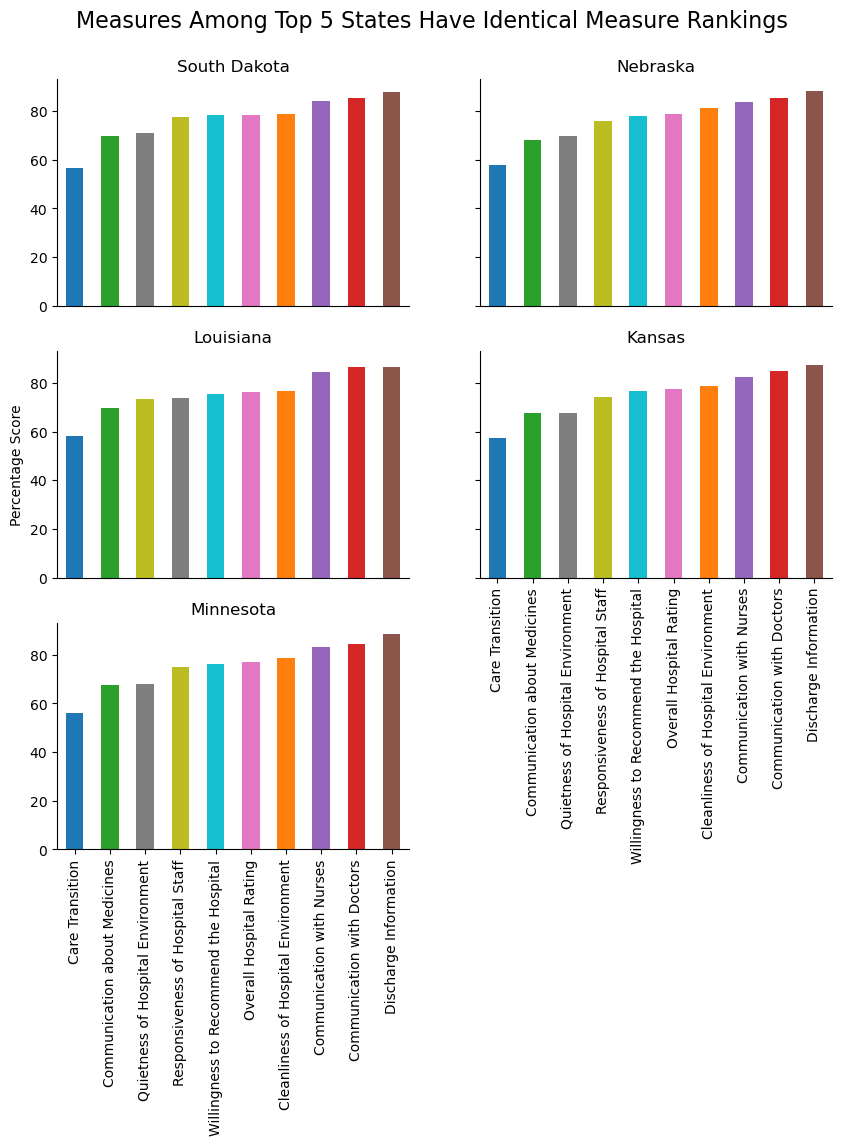

In [24]:
# Group state response data by state with all boxes 

boxscores_by_state = (results_states.groupby('State Name')
                      [['Bottom-box Percentage', 'Middle-box Percentage', 'Top-box Percentage']].mean())

display(boxscores_by_state.head())

# Only use top box to find highest scoring states 

top5_topbox = (boxscores_by_state[['Top-box Percentage']]
               .sort_values('Top-box Percentage', ascending=True).iloc[-5:])

# Visualize top 5 states in top box 

top5_topbox.plot.bar(
    xlabel='',
    ylabel='Percentage Score',
    legend=False
)

plt.suptitle('Top 5 States of Top-Box Scores', y=.94, fontsize=16)
sns.despine()

# Visualize states side by side by measure 

fig, ax = plt.subplots(3, 2, figsize=(10, 10), sharey='all')

(results_states.query("`State Name` == 'South Dakota'")
 .groupby('Measure')['Top-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[0][0], 
     title='South Dakota',
     xlabel='',
     xticks=[],
     color=['#1f77b4', '#2ca02c', '#7f7f7f', '#bcbd22', '#17becf',
           '#e377c2', '#ff7f0e', '#9467bd', '#d62728', '#8c564b']
 ))

(results_states.query("`State Name` == 'Nebraska'")
 .groupby('Measure')['Top-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[0][1], 
     title='Nebraska',
     xlabel='',
     xticks=[],
     color=['#1f77b4', '#2ca02c', '#7f7f7f', '#bcbd22', '#17becf',
           '#e377c2', '#ff7f0e', '#9467bd', '#d62728', '#8c564b']
 ))


(results_states.query("`State Name` == 'Louisiana'")
 .groupby('Measure')['Top-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[1][0], 
     title='Louisiana',
     xlabel='',
     xticks=[],
     ylabel='Percentage Score',
     color=['#1f77b4', '#2ca02c', '#bcbd22', '#7f7f7f', '#17becf',
           '#e377c2', '#ff7f0e', '#9467bd', '#d62728', '#8c564b']
 ))


(results_states.query("`State Name` == 'Kansas'")
 .groupby('Measure')['Top-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[1][1], 
     title='Kansas',
     xlabel='',
     color=['#1f77b4', '#2ca02c', '#7f7f7f', '#bcbd22', '#17becf',
           '#e377c2', '#ff7f0e', '#9467bd', '#d62728', '#8c564b']
 ))


(results_states.query("`State Name` == 'Minnesota'")
 .groupby('Measure')['Top-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[2][0], 
     title='Minnesota',
     xlabel='',
     color=['#1f77b4', '#2ca02c', '#7f7f7f', '#bcbd22', '#17becf',
           '#e377c2', '#ff7f0e', '#9467bd', '#d62728', '#8c564b']
 ))


ax[2][1].set_axis_off()

plt.suptitle('Measures Among Top 5 States Have Identical Measure Rankings', y=.95, fontsize=16)
sns.despine()

## What states performed lowest among bottom-box percentages? <a class='anchor' id='14'></a>

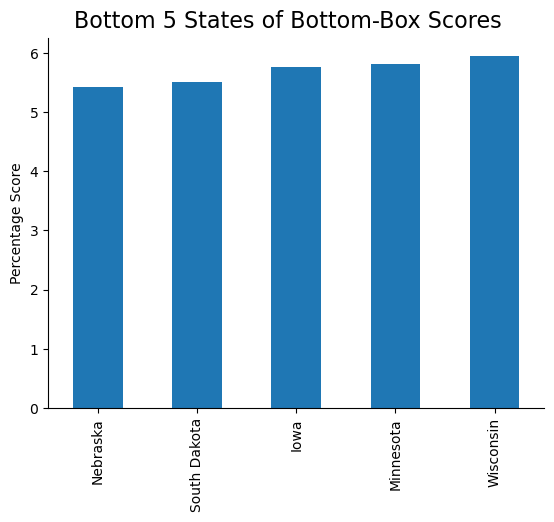

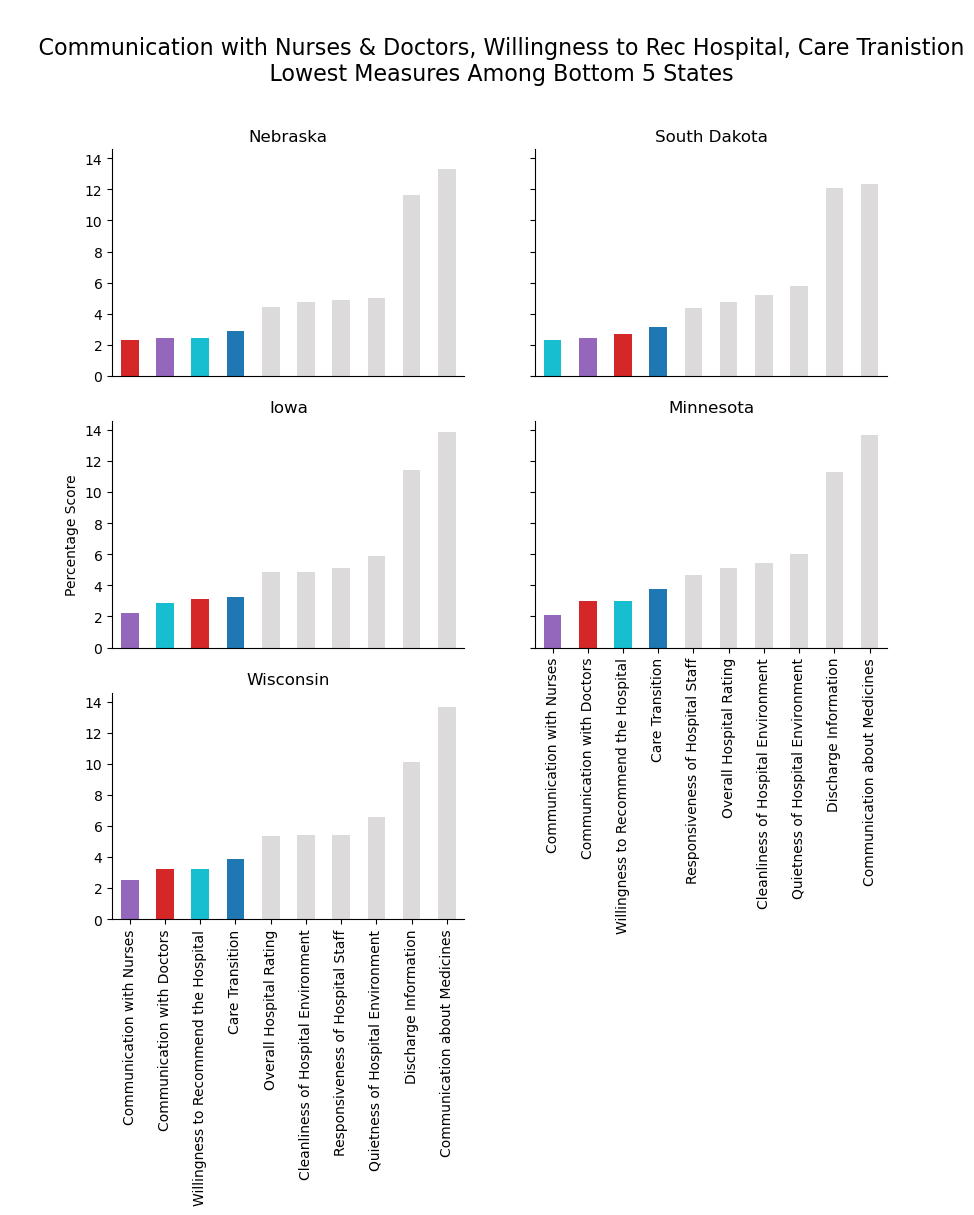

In [25]:
# Only use bottom box to find lowest scoring states 

bottom5_bottombox = (boxscores_by_state[['Bottom-box Percentage']]
                     .sort_values('Bottom-box Percentage', ascending=True).head())

# Visualize bottom 5 states in bottom box 

bottom5_bottombox.plot.bar(
    xlabel='',
    ylabel='Percentage Score',
    legend=False
)

plt.suptitle('Bottom 5 States of Bottom-Box Scores', y=.94, fontsize=16)
sns.despine()

# Visualize states side by side by measure 

fig, ax = plt.subplots(3, 2, figsize=(10, 10), sharey='all')

(results_states.query("`State Name` == 'Nebraska'")
 .groupby('Measure')['Bottom-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[0][0], 
     title='Nebraska',
     xlabel='',
     xticks=[],
     color=['#d62728', '#9467bd', '#17becf', '#1f77b4', '#DCDADA',
           '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA']
 ))

(results_states.query("`State Name` == 'South Dakota'")
 .groupby('Measure')['Bottom-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[0][1],
     title='South Dakota', 
     xlabel='',
     xticks=[], 
     color=['#17becf', '#9467bd', '#d62728', '#1f77b4', '#DCDADA',
           '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA']
))

(results_states.query("`State Name` == 'Iowa'")
 .groupby('Measure')['Bottom-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[1][0],
     title='Iowa', 
     xlabel='',
     xticks=[],
     ylabel='Percentage Score',
     color=['#9467bd', '#17becf', '#d62728', '#1f77b4', '#DCDADA',
           '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA']
 ))

(results_states.query("`State Name` == 'Minnesota'")
 .groupby('Measure')['Bottom-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[1][1],
     title='Minnesota', 
     xlabel='',
     color=['#9467bd', '#d62728', '#17becf', '#1f77b4', '#DCDADA',
           '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA']
 ))

(results_states.query("`State Name` == 'Wisconsin'")
 .groupby('Measure')['Bottom-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[2][0],
     title='Wisconsin', 
     xlabel='',
     color=['#9467bd', '#d62728', '#17becf', '#1f77b4', '#DCDADA',
           '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA']
 ))

ax[2][1].set_axis_off()

plt.suptitle(
    '''
    Communication with Nurses & Doctors, Willingness to Rec Hospital, Care Tranistion
    Lowest Measures Among Bottom 5 States
    ''', 
    y=1.02, fontsize=16)
sns.despine()

### Summary: <a class='anchor' id='sum_seven'></a>

Measure rankings among top box states are identical across all measures while bottom box states shared communication with nurses, communication with doctors, willingness to recommend hospital, & care tranistion as lowest. Communication with nurses appeared among lowest measure at the state level as it did at the national level. 

## What regions performed highest among top-box percentages? <a class='anchor' id='15'></a>

,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
Region,,,
East North Central,7.495556,20.124444,72.380000
East South Central,8.613889,19.027778,72.358333
Mid-Atlantic,10.403704,22.300000,67.296296
Mountain,8.300000,20.545833,71.154167
New England,8.157407,20.674074,71.168519


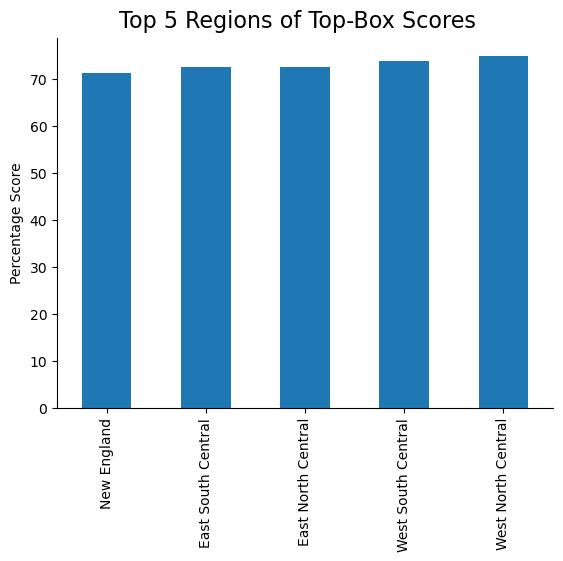

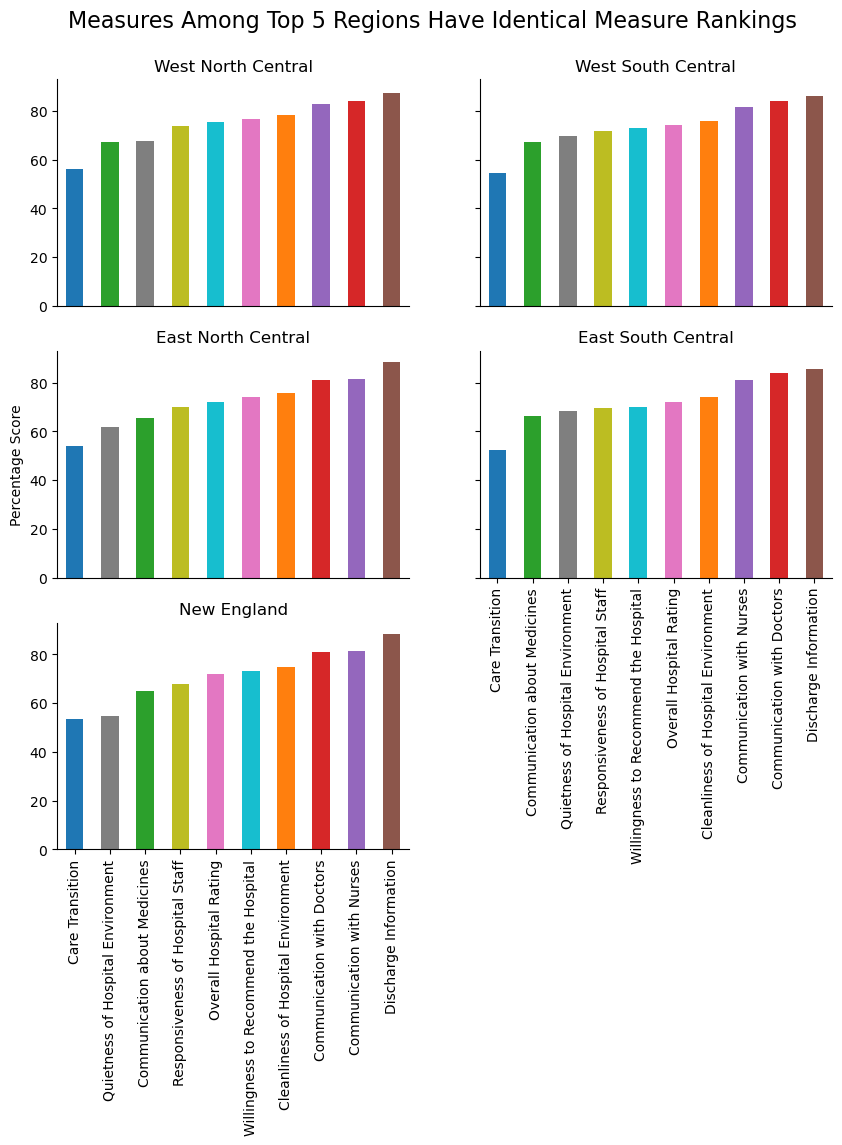

In [26]:
# Group state response data by region with all boxes 

boxscores_by_region = (results_states.groupby('Region')
                       [['Bottom-box Percentage', 'Middle-box Percentage', 'Top-box Percentage']].mean())

display(boxscores_by_region.head())

# Only use top box to find hgihest scoring regions 

region_topbox = (boxscores_by_region[['Top-box Percentage']]
                 .sort_values('Top-box Percentage', ascending=True).iloc[-5:])

region_topbox.plot.bar(
    xlabel='',
    ylabel='Percentage Score',
    legend=False
)

plt.suptitle('Top 5 Regions of Top-Box Scores', y=.94, fontsize=16)
sns.despine()

# Visualize regions side by side by measure 

fig, ax = plt.subplots(3, 2, figsize=(10, 10), sharey='all')

(results_states.query("Region == 'West North Central'")
 .groupby('Measure')['Top-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[0][0], 
     xlabel='',
     xticks=[],
     title='West North Central',
     color=['#1f77b4', '#2ca02c', '#7f7f7f', '#bcbd22', '#17becf',
           '#e377c2', '#ff7f0e', '#9467bd', '#d62728', '#8c564b']
 ))


(results_states.query("Region == 'West South Central'")
 .groupby('Measure')['Top-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[0][1], 
     xlabel='',
     xticks=[],
     title='West South Central',
     color=['#1f77b4', '#2ca02c', '#7f7f7f', '#bcbd22', '#17becf',
           '#e377c2', '#ff7f0e', '#9467bd', '#d62728', '#8c564b']
 ))

(results_states.query("Region == 'East North Central'")
 .groupby('Measure')['Top-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[1][0], 
     xlabel='',
     xticks=[],
     ylabel='Percentage Score',
     title='East North Central',
     color=['#1f77b4', '#7f7f7f', '#2ca02c', '#bcbd22', '#17becf',
          '#e377c2', '#ff7f0e', '#d62728', '#9467bd', '#8c564b']
 ))

(results_states.query("Region == 'East South Central'")
 .groupby('Measure')['Top-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[1][1], 
     xlabel='',
     title='East South Central',
     color=['#1f77b4', '#2ca02c', '#7f7f7f', '#bcbd22', '#17becf',
           '#e377c2', '#ff7f0e', '#9467bd', '#d62728', '#8c564b']
 ))

(results_states.query("Region == 'New England'")
 .groupby('Measure')['Top-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[2][0], 
     xlabel='',
     title='New England',
     color=['#1f77b4', '#7f7f7f', '#2ca02c', '#bcbd22', '#e377c2',
          '#17becf', '#ff7f0e', '#d62728', '#9467bd', '#8c564b']
 ))

ax[2][1].set_axis_off()

plt.suptitle('Measures Among Top 5 Regions Have Identical Measure Rankings', y=.95, fontsize=16)
sns.despine()

## What regions performed lowest among bottom-box percentages? <a class='anchor' id='16'></a>

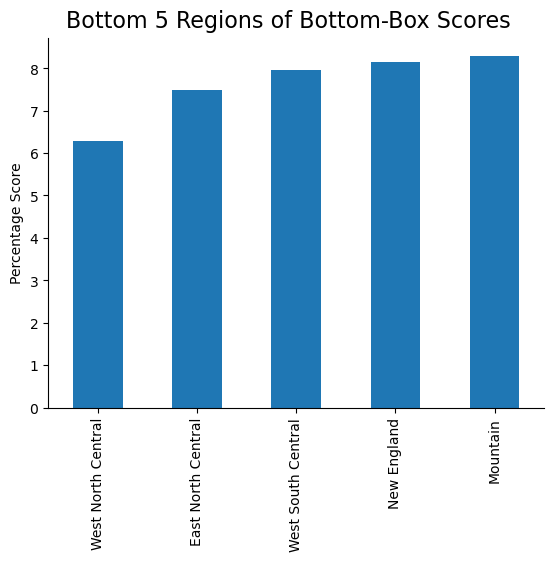

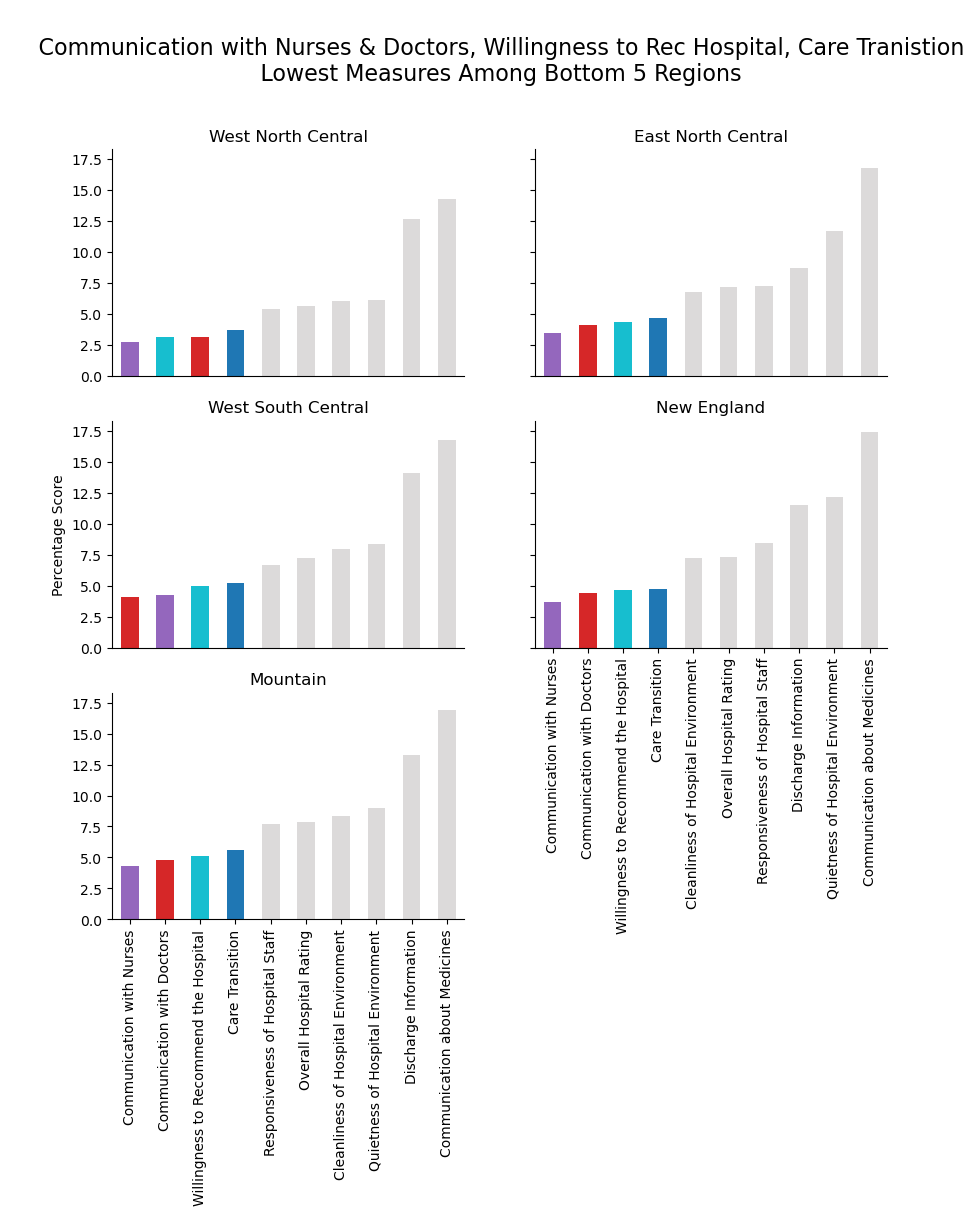

In [27]:
# Only use bottom box to find lowest scoring regions 

region_bottombox = (boxscores_by_region[['Bottom-box Percentage']]
                    .sort_values('Bottom-box Percentage', ascending=True).head())

region_bottombox.plot.bar(
    xlabel='',
    ylabel='Percentage Score',
    legend=False
)

plt.suptitle('Bottom 5 Regions of Bottom-Box Scores', y=.94, fontsize=16)
sns.despine()

# Visualize regions side by side by measure 

fig, ax = plt.subplots(3, 2, figsize=(10, 10), sharey='all')

(results_states.query("Region == 'West North Central'")
 .groupby('Measure')['Bottom-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[0][0], 
     xlabel='',
     xticks=[],
     title='West North Central',
     color=['#9467bd', '#17becf', '#d62728', '#1f77b4', '#DCDADA',
           '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA']
 ))

(results_states.query("Region == 'East North Central'")
 .groupby('Measure')['Bottom-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[0][1], 
     xlabel='',
     xticks=[],
     title='East North Central',
     color=['#9467bd', '#d62728', '#17becf', '#1f77b4', '#DCDADA',
           '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA']
 ))

(results_states.query("Region == 'West South Central'")
 .groupby('Measure')['Bottom-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[1][0], 
     xlabel='',
     xticks=[],
     ylabel='Percentage Score',
     title='West South Central',
     color=['#d62728', '#9467bd', '#17becf', '#1f77b4', '#DCDADA',
           '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA']
 ))

(results_states.query("Region == 'New England'")
 .groupby('Measure')['Bottom-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[1][1], 
     title='New England',
     xlabel='',
     color=['#9467bd', '#d62728', '#17becf', '#1f77b4', '#DCDADA',
           '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA']
 ))

(results_states.query("Region == 'Mountain'")
 .groupby('Measure')['Bottom-box Percentage'].mean().sort_values().plot.bar(
     ax=ax[2][0], 
     xlabel='',
     title='Mountain',
     color=['#9467bd', '#d62728', '#17becf', '#1f77b4', '#DCDADA',
           '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA', '#DCDADA']
 ))

ax[2][1].set_axis_off()

plt.suptitle(
    '''
    Communication with Nurses & Doctors, Willingness to Rec Hospital, Care Tranistion
    Lowest Measures Among Bottom 5 Regions
    ''', 
    y=1.02, fontsize=16)
sns.despine()

### Summary: <a class='anchor' id='sum_eight'></a>

Similar to the state level, regional measure rankings were identical among top box regions, while bottom box regions shared communication with nurses, communication with doctors, willingness to recommend hospital, & care tranistion as lowest measures. Communication with nurses appeared as lowest measure at the state, regional, and national level

## Recommendations: <a class='anchor' id='recs'></a>

* National response rates have decreased by 8% since 2015 release period so initiatives should work towards increasing response rates on a national and state level 

* Further analysis should explore the reasons for decreased response rates and methods of survey delivery to improve patient participation for increased data that will drive quality of care

* D.C., New Mexico, Georgia, New Jersey, and Alaska have fallen nearly 5% below national average response rate and should be prioritized during state initiatives to increase state level reimbursements 

* South Atlantic, Pacific, West South Central, East South Central regions fell below national average response rates and should be targeted to increase national response rate and regional level reimbursements

* Communication with nurses were the lowest measure at the state, regional, and national level, and may benefit from further exploration to what is driving this patient perception, along with deeper data analysis behind the three questions that drive this measure, to increase HCAHPS scores

## References:

1. Centers for Medicare & Medicaid Services. HCAHPS: Patients’ perspectives of care survey . Cms.gov. Published September 6, 2023. https://www.cms.gov/medicare/quality/initiatives/hospital-quality-initiative/hcahps-patients-perspectives-care-survey
2. Understanding HCAHPS Scores Part 2: Calculating the Value in the Hospital Value-Based Purchasing (VBP) Program. www.linkedin.com. Accessed June 21, 2024. https://www.linkedin.com/pulse/understanding-hcahps-scores-part-2-calculating-value-vbp-reitano-jr-/?trackingId=j54SsbTfRiWVT%2Bv6wRr7qQ%3D%3D